# Introduction to Regression with Neural Networks in Tensorflow

Regression is basically predicting numerical variables based on other combinations of variables

In [2]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


# Create some data to view and fit

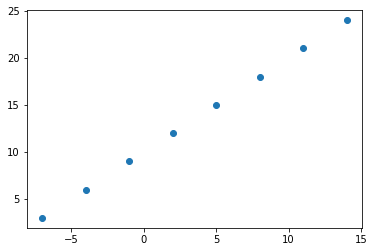

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4,-1,2,5,8,11,14])

#Create labels
y=np.array([3.0,6,9,12,15,18,21,24])

#Visualise it
plt.scatter(X,y)

In [8]:
#See the relationship between X and y
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [17]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y= tf.cast(tf.constant(y),dtype=tf.float32)

In [18]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Modelling in Tensorflow

1. **Create a model** - define input and output layers as well as the hidden layers of the neural network
2. **Compiling model** - Define the loss function and optimizers
3. **Fitting the model** on the training data
4. **Evaluvate the model** on the testing data

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [36]:
#Set random seed for repoducability
tf.random.set_seed(42)

#1. Create a model using the Sequential API

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1) # Just one layer
# ])

#2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X,y,epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 997us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 999us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 998us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 996us/step - loss: 10.9748 - mae: 10.9748


In [37]:
#Chck X and y values
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [39]:
#Make a prediction using out model
model.predict([17.0])

array([[12.716021]], dtype=float32)

From the above, we notice the predicted value is far ahead of the expected value.

# Improving the model
To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [41]:
#Rebuilding our model -> Increaseing the number of epochs to 100

#1. Create the model 
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 997us/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 998us/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 995us/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

1/1 [==============================] - 0s 2ms/step - loss: 6.9600 - mae: 6.9600
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 996us/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 996us/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9038 

Just by altering one hyperparameter from our model i.e. number of epochs , we reduced our loss to around 7.

In [42]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [44]:
model.predict([17])

array([[29.739855]], dtype=float32)

This prediction is much better than before from 12 to 29. 

In [49]:
#Rebuilding the model -> Here we change the the optimizer from SGD to Adam

#1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss = tf.keras.losses.MAE,
             optimizer = tf.keras.optimizers.Adam(),
             metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 997us/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 996us/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 998us/step - loss: 10.1911 - mae: 10.1911
Epoch 87/100
1/1 [==============================] - 0s 997us/step - loss: 10.1866 - mae: 10.1866
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 10.1821 - mae: 10.1821
Epoch 89/100
1/1 [==============================] - 0s 996us/step - loss: 10.1776 - mae: 10.1776
Epoch 90/100
1/1 [==============================] - 0s 993us/step - loss: 10.1731 - mae: 10.1731
Epoch 91/100
1/1 [==============================] - 0s 998us/step - loss: 10.1686 - mae: 10.1686
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1641 - mae: 10.1641
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 10.1596 - mae: 10.1596
Epoch 94/100
1/1 [==============================] - 0s 997us/step - loss: 10.1551 - mae: 10.1551
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1506 - mae: 10.1506
Epoch 96/100
1/1 [==============================] - 0

In [51]:
model.predict([17.0])

array([[16.014063]], dtype=float32)

In [94]:
#Create another model

#1. Create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None)) #Additional hidden layer added
model.add(tf.keras.layers.Dense(1))

#2.Compile model
model.compile(loss=tf.keras.losses.MAE,
             optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])

#3.Fit the model
model.fit(X,y,epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 998us/step - loss: 13.3798 - mae: 13.3798
Epoch 2/150
1/1 [==============================] - 0s 2ms/step - loss: 12.6559 - mae: 12.6559
Epoch 3/150
1/1 [==============================] - 0s 998us/step - loss: 11.9359 - mae: 11.9359
Epoch 4/150
1/1 [==============================] - 0s 2ms/step - loss: 11.2167 - mae: 11.2167
Epoch 5/150
1/1 [==============================] - 0s 0s/step - loss: 10.4949 - mae: 10.4949
Epoch 6/150
1/1 [==============================] - 0s 996us/step - loss: 9.7677 - mae: 9.7677
Epoch 7/150
1/1 [==============================] - 0s 997us/step - loss: 9.0325 - mae: 9.0325
Epoch 8/150
1/1 [==============================] - 0s 3ms/step - loss: 8.2863 - mae: 8.2863
Epoch 9/150
1/1 [==============================] - 0s 0s/step - loss: 7.5261 - mae: 7.5261
Epoch 10/150
1/1 [==============================] - 0s 1ms/step - loss: 6.7941 - mae: 6.7941
Epoch 11/150
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.2929 - mae: 0.2929
Epoch 88/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2163 - mae: 0.2163
Epoch 89/150
1/1 [==============================] - 0s 2ms/step - loss: 0.1646 - mae: 0.1646
Epoch 90/150
1/1 [==============================] - 0s 996us/step - loss: 0.2218 - mae: 0.2218
Epoch 91/150
1/1 [==============================] - 0s 998us/step - loss: 0.1570 - mae: 0.1570
Epoch 92/150
1/1 [==============================] - 0s 2ms/step - loss: 0.1525 - mae: 0.1525
Epoch 93/150
1/1 [==============================] - 0s 1ms/step - loss: 0.1172 - mae: 0.1172
Epoch 94/150
1/1 [==============================] - 0s 2ms/step - loss: 0.0220 - mae: 0.0220
Epoch 95/150
1/1 [==============================] - 0s 997us/step - loss: 0.1700 - mae: 0.1700
Epoch 96/150
1/1 [==============================] - 0s 997us/step - loss: 0.1168 - mae: 0.1168
Epoch 97/150
1/1 [==============================] - 0s 997us/step - loss: 0

In [102]:
int(model.predict([21]))

30

<b>NOTE : Common ways to improve a deep model :</b>
1. Adding Layers
2. Increasing number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate